In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [6]:
#Reading from CSV File and Storing in Dataframe
X_train = pd.read_csv('../../Dataset/x_train_all.csv')
y_train = pd.read_csv('../../Dataset/y_train_all.csv')
X_test = pd.read_csv('../../Dataset/x_test_all.csv')
y_test = pd.read_csv('../../Dataset/y_test_all.csv')

In [7]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy') 

In [8]:
# Train the classifier on the training set
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [9]:
# Predict on the training set
train_predictions = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Accuracy on Training Set: {train_accuracy}")

Accuracy on Training Set: 1.0


In [10]:
# Predict on the testing set
test_predictions = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy on Test Set: {test_accuracy}")

Accuracy on Test Set: 0.7300970873786408


In [11]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.52      0.62      0.56        60
           1       0.74      0.80      0.77       720
           2       0.76      0.77      0.77       750
           3       0.75      0.73      0.74       450
           4       0.80      0.73      0.76       660
           5       0.67      0.80      0.73        60
           6       0.48      0.49      0.48        90
           7       0.59      0.28      0.38        60
           8       0.59      0.65      0.62       150
           9       0.56      0.50      0.53        90

    accuracy                           0.73      3090
   macro avg       0.65      0.64      0.63      3090
weighted avg       0.73      0.73      0.73      3090



In [18]:
# Calculating precision, recall, and F1-score for each class
precision = precision_score(y_test, test_predictions, average=None)
recall = recall_score(y_test, test_predictions, average=None)
f1 = f1_score(y_test, test_predictions, average=None)


In [20]:
#Creating dataframe of precision, recall, and F1-score for each class
df = pd.DataFrame({'Precision': precision, 'F1 Score': f1, 'Recall': recall})
df

,Precision,F1 Score,Recall
0,0.521127,0.564885,0.616667
1,0.741026,0.770667,0.802778
2,0.760841,0.766380,0.772000
3,0.748858,0.738739,0.728889
4,0.801997,0.764473,0.730303
5,0.666667,0.727273,0.800000
6,0.478261,0.483516,0.488889
7,0.586207,0.382022,0.283333
8,0.593939,0.622222,0.653333
9,0.555556,0.526316,0.500000


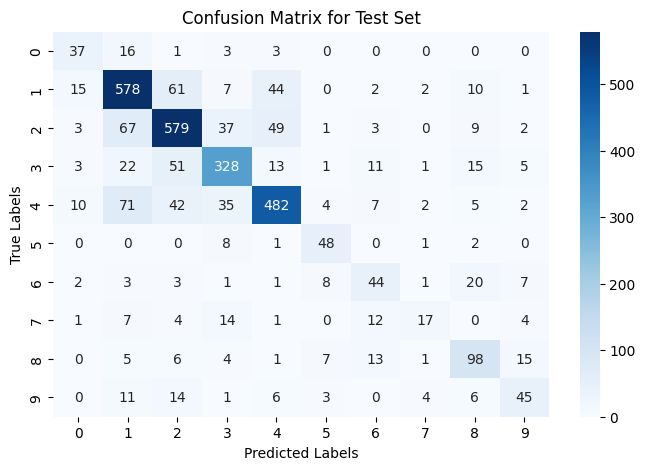

In [23]:
# Generate and visualize the confusion matrix for the test set
cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()
